In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())


from tabularmagic.api import TabularMagic
from tabularmagic.api.mlR import (LinearR, RobustLinearR, 
    SVMR, MLPR, TreeEnsembleR, KBestSelectorR)
from tabularmagic.api.mlC import LinearC



df_train = pd.read_csv(f'{directory_path}/house_price_data/train.csv', index_col='Id')

display(df_train.head())
print('df shape:', df_train.shape)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


df shape: (1460, 80)


In [2]:
tm = TabularMagic(df_train, test_size=0.2, name='Housing sale price data')
tm

INFO: Initialization complete. Shapes of train, test DataFrames: (1168, 80), 
      (292, 80). 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, 
  LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, 
  RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, 
  ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, 
  BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, 
  Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, 
  PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition 
                                                                                
Continuous variables:
  MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, 
  YearRemodAdd, Mas

In [3]:
tm.eda('all').anova_oneway(
    continuous_var='SalePrice', stratify_by='Exterior2nd'
)

One-way ANOVA 
--------------------------------------------------------------------------------
f-statistic: 17.501                        p-value: 0.0                          
--------------------------------------------------------------------------------
H0: All group means are equal 
HA: At least one group mean is different from the others 

In [7]:
tm.eda('all').ttest(
    continuous_var='SalePrice', stratify_by='Street'
)

Welch's t-test 
--------------------------------------------------------------------------------
t-statistic: -1.901                       p-value: 0.115                         
--------------------------------------------------------------------------------
H0: mu_1 = mu_2 
HA: mu_1 != mu_2 
mu_1 - mu_2: -50940.039 
Degrees of freedom: 5.061 
--------------------------------------------------------------------------------
Group 1 label: Grvl. Group 2 label: Pave.  

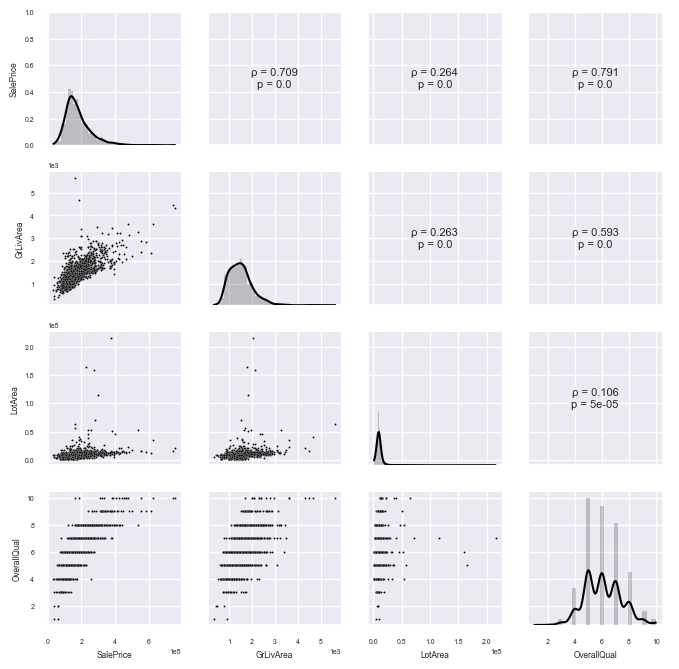

In [4]:
tm.eda('all').plot_continuous_pairs(
    continuous_vars=['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual']
)

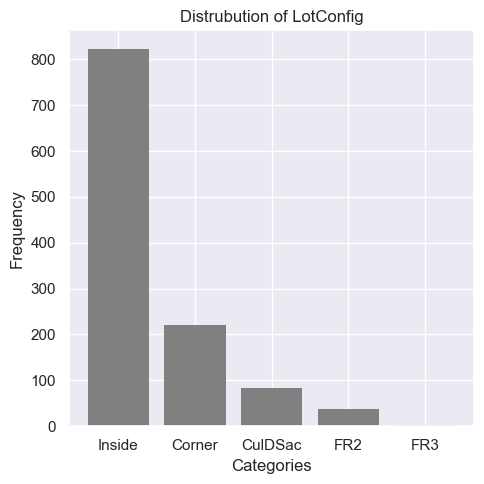

In [5]:
tm.eda().plot_distribution('LotConfig')

In [6]:
tm.datahandler().force_binary(['LotConfig'], 
                              'Inside',
                              ignore_multiclass=True)

INFO: Forced variables LotConfig to binary. 


Housing sale price data 
--------------------------------------------------------------------------------
Train shape: (1168, 80)                  Test shape: (292, 80)                  
--------------------------------------------------------------------------------
Categorical variables:
  MSZoning, Street, Alley, LotShape, LandContour, Utilities, LandSlope, 
  Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, 
  RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, 
  Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, 
  Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, 
  FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, 
  PoolQC, Fence, MiscFeature, SaleType, SaleCondition 
                                                                                
Continuous variables:
  MSSubClass, LotFrontage, LotArea, LotConfig, OverallQual, OverallCond, 
  YearBuilt, YearRemodAdd, Mas

In [10]:
report = tm.ml_regression(
    models=[
        LinearR('ols'),
        LinearR('l1'), 
        LinearR('l2'), 
        SVMR('rbf'), 
        TreeEnsembleR('adaboost')
    ],
    y_var='SalePrice',
    X_vars=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea'],
    outer_cv=5
)

INFO: Fitting model LinearR(ols). 
INFO: Fitted model LinearR(ols). 
INFO: Fitting model LinearR(l1). 
INFO: Fitted model LinearR(l1). 
INFO: Fitting model LinearR(l2). 
INFO: Fitted model LinearR(l2). 
INFO: Fitting model SVMR(rbf). 
INFO: Fitted model SVMR(rbf). 
INFO: Fitting model TreeEnsembleR(adaboost). 
INFO: Fitted model TreeEnsembleR(adaboost). 


In [13]:
report.fit_statistics('train')

,LinearR(ols)_train_cv,LinearR(l1)_train_cv,LinearR(l2)_train_cv,SVMR(rbf)_train_cv,TreeEnsembleR(adaboost)_train_cv
Statistic,,,,,
rmse,45608.185426,45607.412832,45620.380946,78705.082548,45064.222868
mad,31678.496165,31645.341988,31642.883245,54428.042457,28857.458065
pearsonr,0.810122,0.810121,0.809979,0.294766,0.812678
spearmanr,0.843444,0.842896,0.843562,0.34219,0.851837
r2,0.649724,0.649728,0.649515,-0.041797,0.654141
adjr2,0.637249,0.637253,0.637032,-0.08373,0.640219
n,233.6,233.6,233.6,233.6,233.6


Fold-specific fit statistics

In [11]:
report.cv_fit_statistics()

LinearR(ols)_train_cv LinearR(l1)_train_cv  \
Fold Statistic                                              
0    rmse               44372.653907         44376.705723   
     mad                30622.440366         30618.828184   
     pearsonr               0.838478             0.838454   
     spearmanr              0.857994             0.857773   
     r2                     0.695391             0.695336   
     adjr2                  0.684561             0.684503   
     n                           234                  234   
1    rmse               46671.086538         46731.609363   
     mad                31778.159811         31818.313937   
     pearsonr               0.806856             0.806257   
     spearmanr              0.870747             0.870926   
     r2                     0.627871             0.626905   
     adjr2                   0.61464              0.61364   
     n                           234                  234   
2    rmse                51971.43197         51880.046764   
     mad                 33434.28897          33213.21851   
     pearsonr               0.774069             0.774944   
     spearmanr              0.836708             0.834167   
     r2                      0.59895             0.600359   
     adjr2                   0.58469              0.58615   
     n                           234                  234   
3    rmse               42888.138283         42888.138274   
     mad                32355.061581         32355.061574   
     pearsonr               0.815273             0.815273   
     spearmanr              0.804204             0.804204   
     r2                     0.662991             0.662991   
     adjr2                  0.650955             0.650955   
     n                           233                  233   
4    rmse               42137.616434         42160.564036   
     mad                30202.530096         30221.287734   
     pearsonr               0.815934             0.815679   
     spearmanr              0.847569             0.847409   
     r2                     0.663418             0.663052   
     adjr2                  0.651398             0.651018   
     n                           233                  233   

               LinearR(l2)_train_cv SVMR(rbf)_train_cv  \
Fold Statistic                                           
0    rmse               44371.27275       82338.271817   
     mad               30602.287593       58138.527994   
     pearsonr               0.83872           0.253083   
     spearmanr             0.857189           0.303765   
     r2                     0.69541          -0.048854   
     adjr2                  0.68458          -0.090995   
     n                          234                234   
1    rmse              46809.036561       77320.863994   
     mad               31841.265752       55308.285077   
     pearsonr              0.805066           0.340136   
     spearmanr             0.869642           0.369603   
     r2                    0.625668          -0.021389   
     adjr2                 0.612358          -0.062427   
     n                          234                234   
2    rmse              51863.434183        84610.19306   
     mad               33280.039587       55895.594241   
     pearsonr              0.775103           0.311479   
     spearmanr             0.834588           0.368057   
     r2                    0.600615          -0.062955   
     adjr2                 0.586415          -0.105663   
     n                          234                234   
3    rmse              42861.051917       75073.537003   
     mad                32321.13982       51953.972709   
     pearsonr              0.815537           0.273212   
     spearmanr             0.807031           0.347361   
     r2                    0.663416          -0.032621   
     adjr2                 0.651396          -0.074297   
     n                          233                233   
4    rmse        

Test fit statistics

In [14]:
report.fit_statistics('test')

,LinearR(ols)_test,LinearR(l1)_test,LinearR(l2)_test,SVMR(rbf)_test,TreeEnsembleR(adaboost)_test
Statistic,,,,,
rmse,49441.401328,49429.400417,49294.984302,88500.869377,42588.861472
mad,31893.192954,31879.403956,31694.256912,59348.013377,28469.53531
pearsonr,0.831046,0.831162,0.832556,0.325503,0.881841
spearmanr,0.85885,0.859459,0.860959,0.398605,0.864246
r2,0.681311,0.681465,0.683195,-0.02113,0.763529
adjr2,0.672302,0.672461,0.67424,-0.05372,0.755982
n,292,292,292,292,292


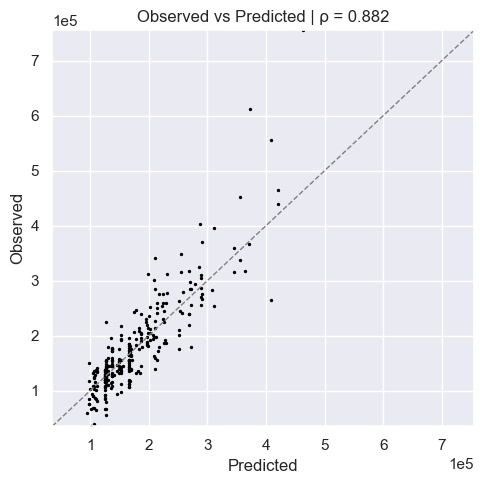

In [15]:
report.model_report('TreeEnsembleR(adaboost)').test_report().plot_obs_vs_pred()